### Imports

In [1]:
import random

from unityagents import UnityEnvironment
import numpy as np
import torch

from agent import Agent
from train import train
from run_game import run_game

### Load Environment

In [2]:
env = UnityEnvironment(file_name='banana_app/Banana.app', seed=random.randint(0,10000))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Get state and action size

In [3]:
env_info = env.reset(train_mode=True)[env.brain_names[0]]
state_size = len(env_info.vector_observations[0]) * 4
action_size = env.brains[env.brain_names[0]].vector_action_space_size

### Run game with previously trained agent

In [4]:
model_state = torch.load('model_weights.pth')
agent = Agent(state_size, action_size, model_state = model_state)
score = run_game(env, agent)
print('Score ' + str(score))

Score 15.0


### Train agent

In [6]:
agent = Agent(state_size, action_size)

scores = train(env, agent, n_episodes = 1000)

# save network model
torch.save(agent.Qθ.state_dict(), 'model_weights.pth')

Episode 0 to 10 scores:  -1 01 00 01 01 02 01 00 01 01
Episode 10 to 20 scores:  00 00 01 00 00 -1 -1 -1 01 -1
Episode 20 to 30 scores:  01 00 00 00 01 02 00 00 -2 -1
Episode 30 to 40 scores:  00 -1 -1 -1 00 01 00 01 01 04
Episode 40 to 50 scores:  -1 -1 01 00 00 01 -1 02 -1 00
Episode 50 to 60 scores:  00 01 -1 01 00 00 01 01 02 -2
Episode 60 to 70 scores:  01 01 00 01 01 -1 02 01 00 02
Episode 70 to 80 scores:  01 01 00 01 00 00 03 01 01 -1
Episode 80 to 90 scores:  01 00 02 03 01 -1 00 02 00 -1
Episode 90 to 100 scores:  00 00 01 00 01 00 -2 -3 01 02
Episode 100 to 110 scores:  04 06 -2 00 -2 00 01 01 00 05
Episode 110 to 120 scores:  01 01 05 -1 02 05 01 -1 -1 02
Episode 120 to 130 scores:  -1 02 01 01 -1 00 00 03 01 01
Episode 130 to 140 scores:  -1 00 02 02 01 02 04 00 01 01
Episode 140 to 150 scores:  03 05 02 00 00 00 03 02 06 02
Episode 150 to 160 scores:  00 00 -1 03 00 -2 03 00 02 01
Episode 160 to 170 scores:  04 01 02 02 -1 04 00 04 06 01
Episode 170 to 180 scores:  00 01 

### Graph training scores

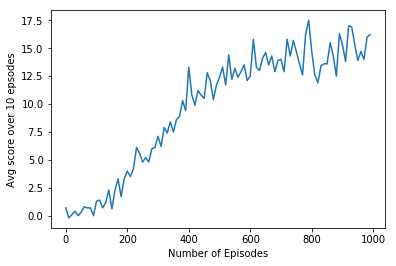

In [7]:
from itertools import zip_longest
import matplotlib.pyplot as plt

means = []
for group in zip_longest(*([iter(scores)] * 10)):
    means.append(np.mean(group))

plt.plot(np.arange(100) * 10, means)
plt.xlabel('Number of Episodes')
plt.ylabel('Avg score over 10 epsodes')
plt.show()